/var/folders/n6/mw81lkxx1r73r1vrmy6934sr0000gn/T/ipykernel_36139/615240921.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="5y", interval="1d")
[*********************100%***********************]  50 of 50 completed
/var/folders/n6/mw81lkxx1r73r1vrmy6934sr0000gn/T/ipykernel_36139/615240921.py:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_dates = data.resample('M').last().index


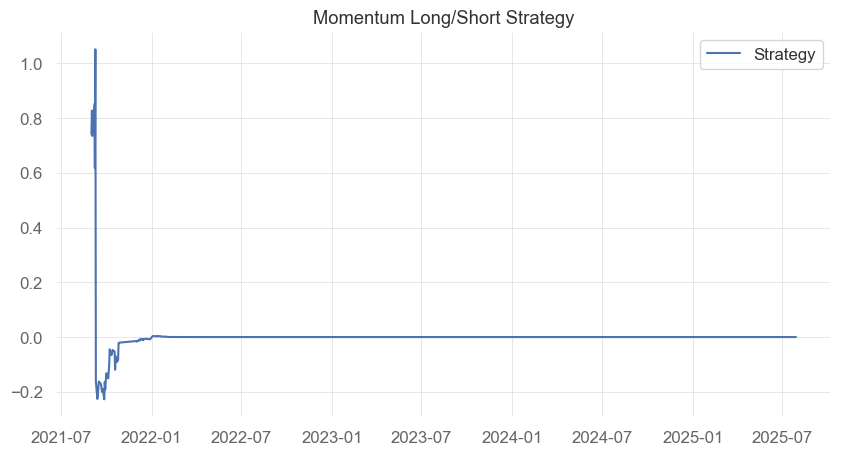

                           Strategy
-------------------------  ----------
Start Period               2021-09-01
End Period                 2025-07-29
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -100.0%
CAGR﹪                     -99.75%

Sharpe                     -0.07
Prob. Sharpe Ratio         45.27%
Smart Sharpe               -0.06
Sortino                    -0.1
Smart Sortino              -0.08
Sortino/√2                 -0.07
Smart Sortino/√2           -0.06
Omega                      0.99

Max Drawdown               -121.63%
Max DD Date                2021-09-27
Max DD Period Start        2021-09-10
Max DD Period End          2025-07-29
Longest DD Days            1419
Volatility (ann.)          585.63%
Calmar                     -0.82
Skew                       -0.09
Kurtosis                   9.63

Expected Daily %           -4.72%
Expected Monthly %         -59.98%
Expected Yearly %          -99.89%
Kelly Criterion            -0

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-09-10,2021-09-27,2025-07-29,1419,-121.633202,-117.466651
2,2021-09-01,2021-09-08,2021-09-08,8,-38.297566,-26.492090


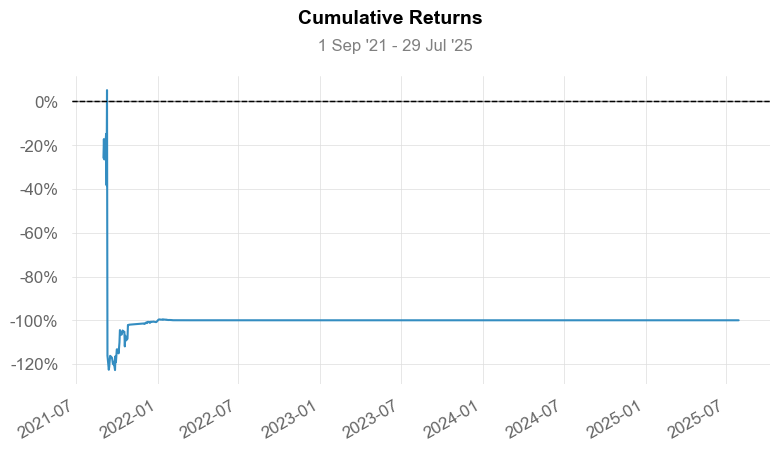

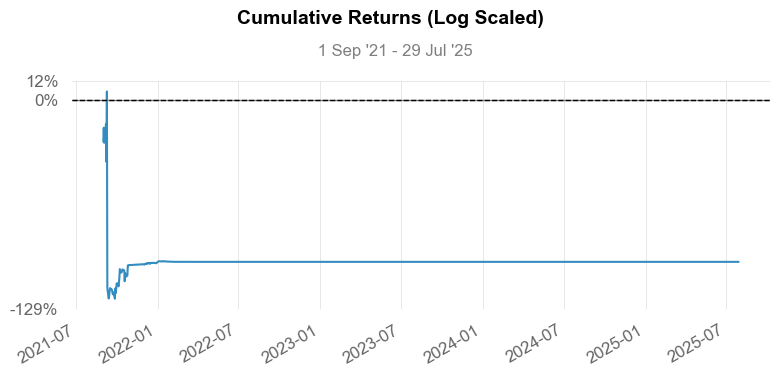

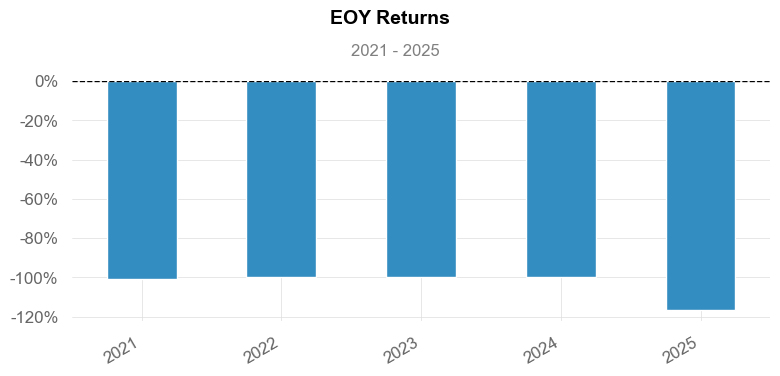

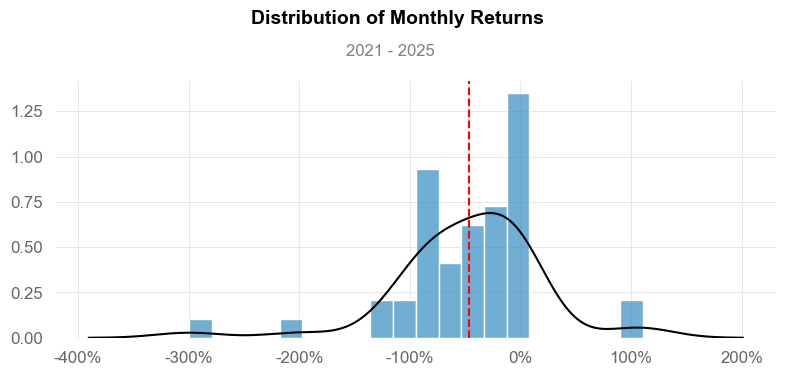

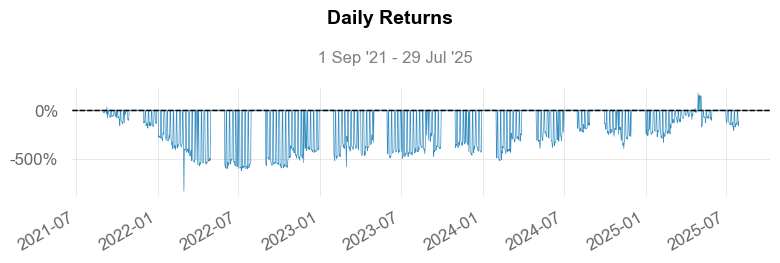

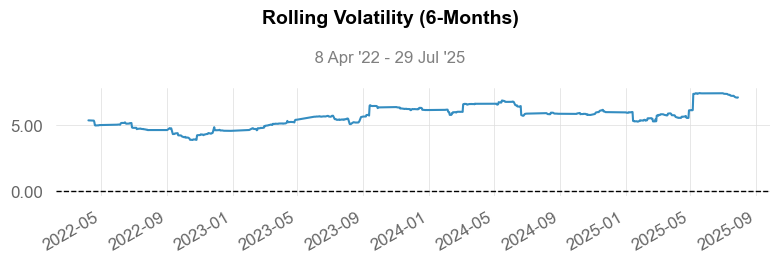

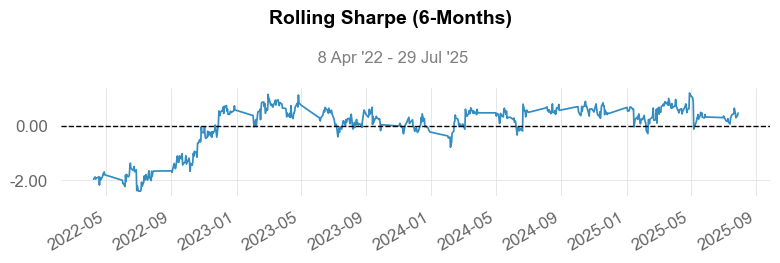

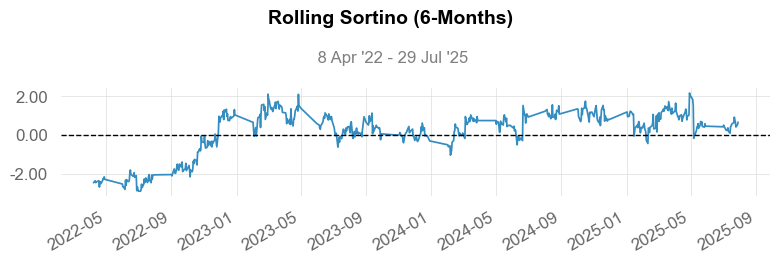

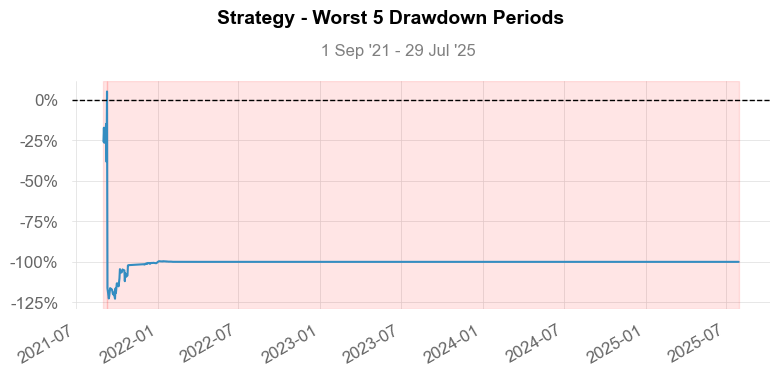

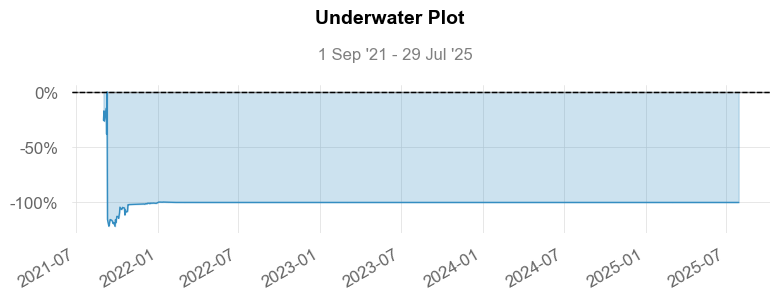

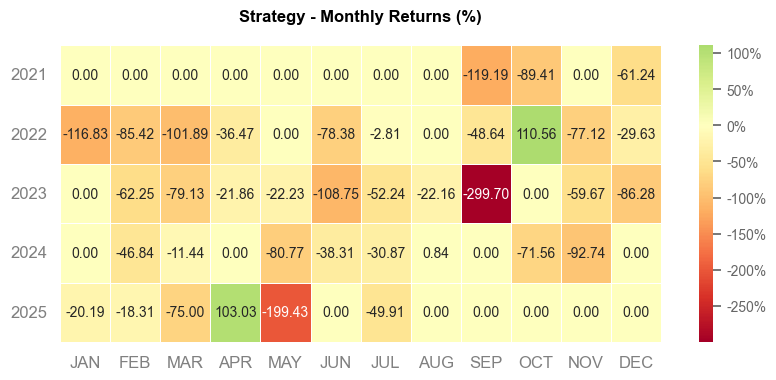

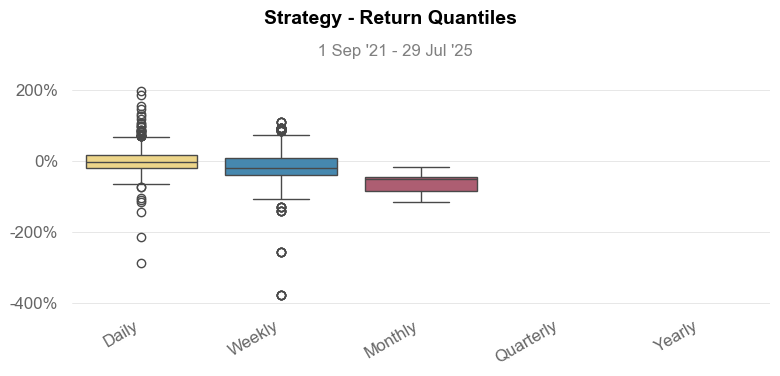

In [2]:
import matplotlib.pyplot as plt
import quantstats as qs
import yfinance as yf
import pandas as pd



#  	1.	Download data

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables = pd.read_html(url)
df_sp500 = tables[0]

# Retrieve the tickers
tickers = df_sp500["Symbol"].head(50).tolist()
tickers = [ticker.replace('.', '-') for ticker in tickers]

# Download historical data
data = yf.download(tickers, period="5y", interval="1d")

# 	2.	Calculation of the momentum :

# --- Ratio calculation : (prix_t - prix_t-252)/prix_t-252 ---
momentum = data.pct_change(252)  # rendement à 1 an

# --- Combine price + ratio in a single table ---
# Assuming a monthly rebalancing
monthly_dates = data.resample('M').last().index

returns = data.pct_change()
portfolio_returns = []

for date in monthly_dates:
    # Select available data at time date
    if date not in momentum.index:
        continue
    mom_scores = momentum.loc[date].dropna()

    # Sort the actions
    top = mom_scores.nlargest(2).index  # top 20%
    bottom = mom_scores.nsmallest(2).index  # bottom 20%

    # Calculation of the portfolio return (long top, short bottom)
    next_month = returns.loc[date:].iloc[1:21]  # arround 20 days
    if not next_month.empty:
        long_ret = next_month[top].mean(axis=1)
        short_ret = next_month[bottom].mean(axis=1)
        portfolio_returns.append(long_ret - short_ret)

# Final series
portfolio_returns = pd.concat(portfolio_returns)
cumulative_returns = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label="Strategy")
plt.title("Momentum Long/Short Strategy")
plt.legend()
plt.show()

# Performance Analysis
qs.reports.full(portfolio_returns)

